In [6]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.model_selection  import train_test_split
from sklearn.cluster import KMeans
#import sklearn.metrics
df = pd.read_csv("technical_support_data.csv")


In [7]:
df.head()

,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent
0,Temperature control not working,170,1.3,32,0.04,0.0,75,25
1,power chord does not tightly fit,12,2.0,150,0.01,0.5,5,95
2,Fan swing not working,5,1.0,35,0.02,0.2,90,10
3,Main switch does not on,3,2.0,8,0.01,0.7,5,95
4,Forgot mobile app password,45,2.3,54,0.15,0.0,99,1


In [8]:
df.dtypes

PROBLEM_TYPE              object
no_of_cases                int64
Avg_pending_calls        float64
Avg_resol_time             int64
recurrence_freq          float64
Replace_percent          float64
In_warranty_percent        int64
Post_warranty_percent      int64
dtype: object

In [ ]:
#for k mean clustering all dtype has to be numerical

In [9]:
numeric_cols = df.drop('PROBLEM_TYPE', axis=1)


In [10]:
Prob_type = df.pop("PROBLEM_TYPE")



In [11]:
from scipy.stats import zscore
numeric_cols = numeric_cols.apply(zscore)

In [12]:
df = numeric_cols.join(Prob_type)


In [13]:
df.head()

,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent,PROBLEM_TYPE
0,0.179429,-0.701207,-0.538351,-0.843188,-0.561463,0.138067,-0.138067,Temperature control not working
1,-0.862176,0.027143,1.510857,-1.101765,2.245854,-1.778204,1.778204,power chord does not tightly fit
2,-0.908323,-1.013357,-0.486253,-1.015573,0.561463,0.548696,-0.548696,Fan swing not working
3,-0.921508,0.027143,-0.955140,-1.101765,3.368781,-1.778204,1.778204,Main switch does not on
4,-0.644625,0.339294,-0.156296,0.104930,-0.561463,0.795074,-0.795074,Forgot mobile app password


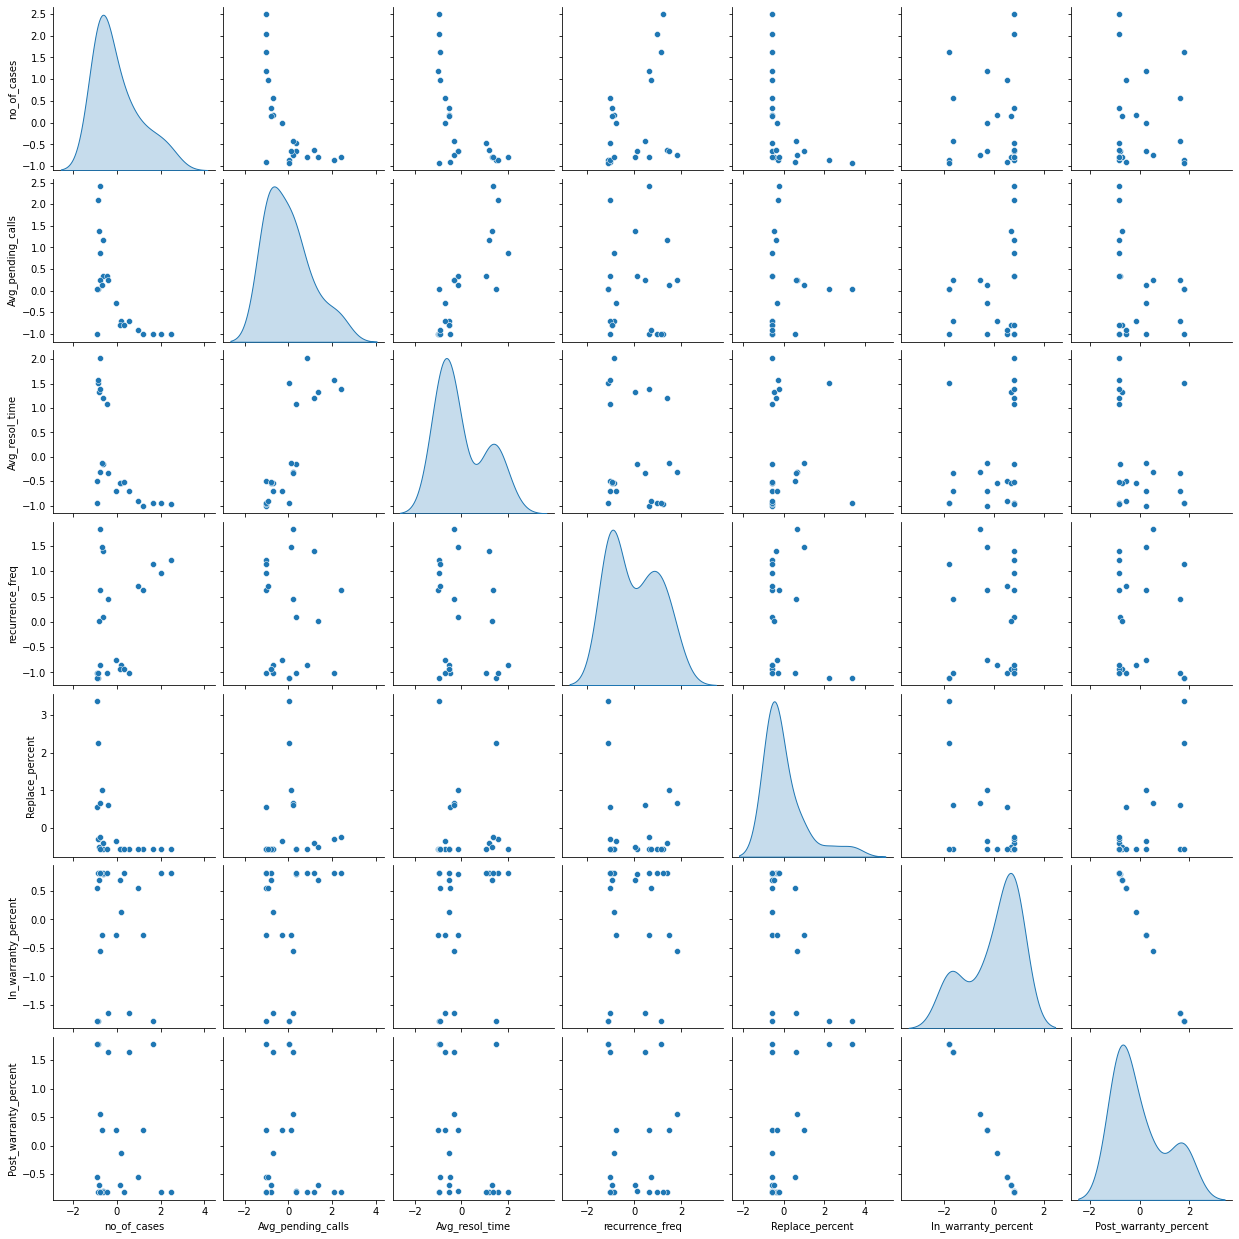

In [14]:
import seaborn as sns
sns.pairplot(numeric_cols, diag_kind='kde')
#diagonal is density curves
# check in diagonal, how many gaussian can be seen. in 1st 3 curves are present 

C:\Users\vaish\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\vaish\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\vaish\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\vaish\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

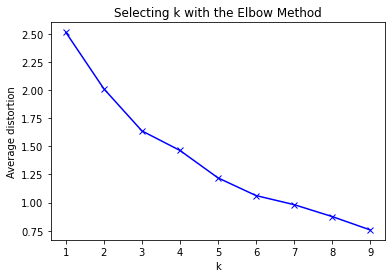

In [15]:
# lets see k values using elbow method
#First, we need to determine the optimal number of groups
tech_supp_attributes = df.drop("PROBLEM_TYPE",axis=1)

#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(tech_supp_attributes)
    prediction=model.predict(tech_supp_attributes)
    meanDistortions.append(sum(np.min(cdist(tech_supp_attributes, model.cluster_centers_, 'euclidean'), axis=1)) / tech_supp_attributes.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')


In [17]:
# Let us first start with K = 2
final_model=KMeans(2)
final_model.fit(tech_supp_attributes)
prediction=final_model.predict(tech_supp_attributes)

#Append the prediction 
df["GROUP"] = prediction
print("Groups Assigned : \n")
df[["PROBLEM_TYPE", "GROUP"]]

C:\Users\vaish\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\vaish\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Groups Assigned : 



,PROBLEM_TYPE,GROUP
0,Temperature control not working,0
1,power chord does not tightly fit,0
2,Fan swing not working,0
3,Main switch does not on,0
4,Forgot mobile app password,1
5,AC stops abruptly,1
6,App hangs while entring commands,1
7,App takes a long time to initialize,0
8,Unable to connect the App to the device,0
9,Reinstalling the app hangs the phone,1


array([[<AxesSubplot:title={'center':'Avg_pending_calls'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'Avg_resol_time'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'In_warranty_percent'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'Post_warranty_percent'}, xlabel='[GROUP]'>],
       [<AxesSubplot:title={'center':'Replace_percent'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'no_of_cases'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'recurrence_freq'}, xlabel='[GROUP]'>,
        <AxesSubplot:>]], dtype=object)

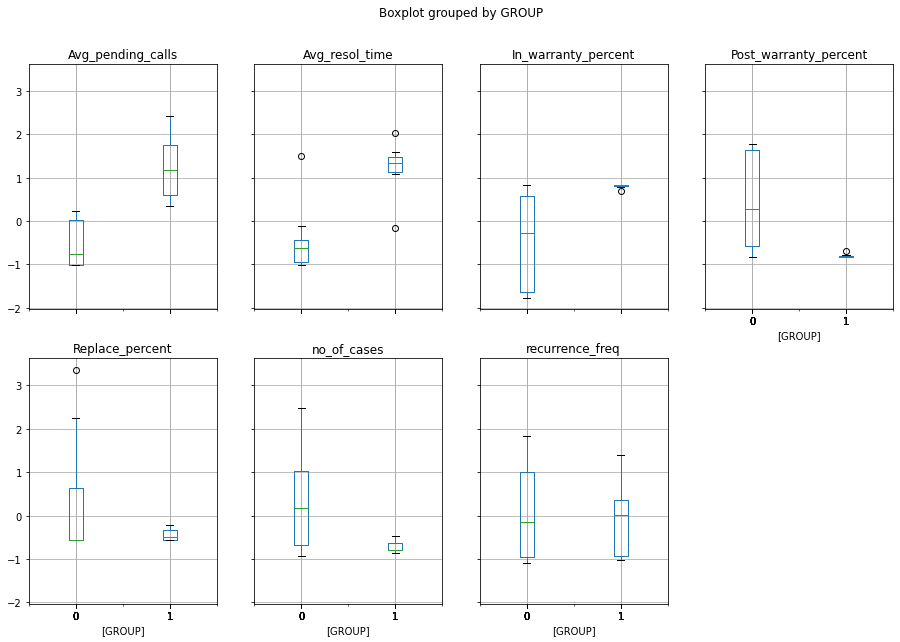

In [18]:
df.boxplot(by = "GROUP", layout=(2,4), figsize=(15,10))
# group wise boxplot

In [ ]:
# The K = 2 boxplot clearly shows outliers in group 1.
# outliers make cluster useless

In [19]:
# Let us first start with K = 3
final_model=KMeans(3)
final_model.fit(tech_supp_attributes)
prediction=final_model.predict(tech_supp_attributes)

df["GROUP"] = prediction
print("Groups Assigned : \n")
df[["PROBLEM_TYPE", "GROUP"]]

C:\Users\vaish\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\vaish\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Groups Assigned : 



,PROBLEM_TYPE,GROUP
0,Temperature control not working,1
1,power chord does not tightly fit,0
2,Fan swing not working,1
3,Main switch does not on,0
4,Forgot mobile app password,1
5,AC stops abruptly,2
6,App hangs while entring commands,2
7,App takes a long time to initialize,1
8,Unable to connect the App to the device,1
9,Reinstalling the app hangs the phone,2


array([[<AxesSubplot:title={'center':'Avg_pending_calls'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'Avg_resol_time'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'In_warranty_percent'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'Post_warranty_percent'}, xlabel='[GROUP]'>],
       [<AxesSubplot:title={'center':'Replace_percent'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'no_of_cases'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'recurrence_freq'}, xlabel='[GROUP]'>,
        <AxesSubplot:>]], dtype=object)

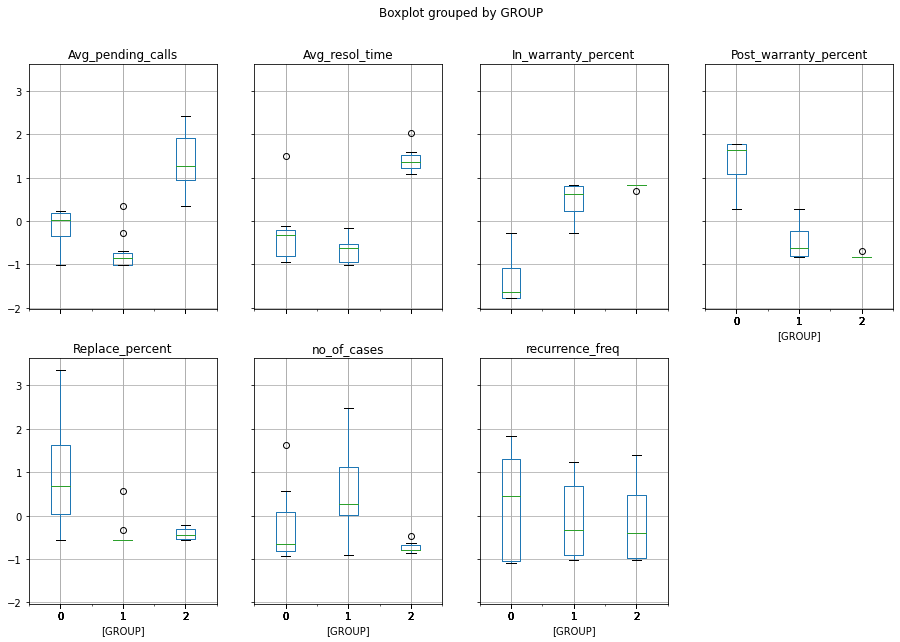

In [20]:
df.boxplot(by = "GROUP", layout=(2,4), figsize=(15,10))

In [ ]:
# in group 1 no. of cases are low but avg res time and pending calls are high, this indicate cases must need some extra technical help
# in group 2 customer can solve prob using the help of manual as no. of cases are not very high and res time is low and pending call is low too